In [3]:
## Project 1
# Data tools
import pandas as pd
import numpy as np
import datetime as dt
import datetime as datetime

# Visualization tools
import matplotlib.pyplot as plt

# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

### Scraping data and setting up data frame.


In [5]:
## Setting up dataframe
# Defined column names to avoid having to clean it up later.
cols = ['control',
        'unit',
        'scp',
        'station',
        'lines',
        'division',
        'date',
        'time',
        'desc',
        'entries',
        'exits']

df_raw = pd.DataFrame(columns=cols)

# Populate date range for analysis & re-format to need
# MTA data is collected and grouped into weekly data ending on Saturday
df_date_range = pd.date_range('20180301', periods=18, freq='W-SAT')
df_date_range = df_date_range.strftime('%y%m%d')

# Option 1: Read from online
# Read each week from MTA website
#for week in date_df:
#    filename = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_' + week + '.txt'
#    temp_df = pd.read_csv(filename, names=cols, header=1)
#    df = df.append(temp_df)

# Option 2: Read from local
for week in df_date_range:
    filename = 'turnstile/turnstile_' + week + '.txt'
    temp_df = pd.read_csv(filename, names=cols, header=1)
    df_raw = df_raw.append(temp_df, ignore_index=True)
    


### Side: flexible year approach for reading March - June data
For this challenge I have chosen to first run it on 2018 only, so this step was unnecessary. Also, columns changed before 2015, so if used to scrape data that includes both 2014 and 2015 files, data frame will not concat properly.

In [ ]:
# Scan and read data from MTA website for all 

# Using 2015-2018 data
# years = [2015, 2016, 2017, 2018] Save for later

#for year in years:
#    date_df = pd.date_range(str(year) + '0301', periods=18, freq='W-SAT')
#    date_df = date_df.strftime('%y%m%d')
#    for week in date_df:
#        filename = 'turnstile_' + week + '.txt'
#        dg = pd.read_csv(filename, names=cols, header=1)
#        df = df.append(dg)


### Checking Data

In [171]:
# Object types
df_raw.dtypes

control     object
unit        object
scp         object
station     object
lines       object
division    object
date        object
time        object
desc        object
entries     object
exits       object
dtype: object

In [173]:
df_raw.tail(5)

,control,unit,scp,station,lines,division,date,time,desc,entries,exits
3548114,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,06/29/2018,05:00:00,REGULAR,2954731,387681
3548115,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,06/29/2018,09:00:00,REGULAR,2954991,387686
3548116,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,06/29/2018,13:00:00,REGULAR,2955443,387690
3548117,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,06/29/2018,17:00:00,REGULAR,2955940,387696
3548118,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,06/29/2018,21:00:00,REGULAR,2956334,387720


In [174]:
# Checking time stamp data
df_time = df_raw.time.value_counts()
df_time

04:00:00    295851
08:00:00    295814
20:00:00    295813
16:00:00    295770
12:00:00    295538
00:00:00    295151
05:00:00    193321
21:00:00    193213
17:00:00    193164
09:00:00    193157
13:00:00    193126
01:00:00    191707
             ...  
14:04:39         1
12:42:39         1
19:37:46         1
20:40:53         1
05:20:53         1
03:20:44         1
03:21:16         1
18:03:56         1
10:54:09         1
02:44:46         1
17:57:02         1
02:55:22         1
Name: time, Length: 69515, dtype: int64

In [175]:
# Duplicate check
# Checks unique values where key is specified by groupby()
# (if all information is unique, entries should show 1)
df.groupby(['control','unit', 'scp', 'station', 'lines', 'date', 'time']).entries.count().reset_index().sort_values('entries', ascending=False).head()

,control,unit,scp,station,lines,date,time,entries
2056908,R135,R031,01-00-00,34 ST-PENN STA,123,03/22/2018,08:00:00,2
1938789,R101,R001,02-00-02,SOUTH FERRY,1RW,05/23/2018,09:00:00,2
1937279,R101,R001,02-00-00,SOUTH FERRY,1RW,05/23/2018,09:00:00,2
1200926,N183,R415,00-00-00,BROAD CHANNEL,AS,04/04/2018,05:00:00,2
2887670,R511,R091,00-00-00,36 AV,NQW,06/21/2018,16:00:00,2


In [176]:
# Checking number of stations
print(df.station.nunique())
print(len(df.groupby(['station','lines'])))
print(df.lines.unique())

362
461
['NQR456W' 'NQRW' 'ACENQRS1237W' 'BDFMNQRW' 'NRW' 'LNQR456W' 'JNQRZ6W'
 'RNW' 'R1W' 'FJMZ' 'JZ' 'JZ456' 'ACJZ2345' 'BQ' 'S' 'S2345' 'BQS' 'Q'
 'R2345' 'R' 'BDNQR' 'BDNQR2345' 'DFGMNR' 'DNR' 'N' 'ND' 'D' 'DFNQ' 'FQ'
 'ACEL' 'FLM123' 'L' 'LG' 'LM' 'JMZ' 'JM' 'J' 'A' 'E' 'M' 'AC1' 'C' 'ABCD'
 'BC' 'ACBD' 'ABCD1' 'CE' 'ACENGRS1237W' 'ACE' 'ABCDEFM' 'ACE23'
 '2345ACJZ' 'AC' 'ACF' 'ACG' 'ACS' 'ACJLZ' 'AS' 'BD' 'BDE' 'EM' 'EM6'
 'EMG' 'EMR' 'MR' 'EFMR7' 'EFMR' 'EF' 'F' 'G' 'GL' 'BDFM' 'BDFM7' 'FM'
 'BDFQ6' 'FG' 'EJZ' '6' '1' '1RW' '23' '23ACE' '123' '123FLM' '123ACE'
 '1237ACENQRSW' '1237ACENQRS' '1ABCD' '1AC' '45' '456JZ' '6DF' '456LNQRW'
 '4567S' '456NQRW' '456' '245' '4' '3' '25' '2' '7BDFM' '7' '7NQW' 'NQW'
 '7EFMR' '2345R' '2345' '2345BDNQR' '2345S' '34' '5']


### Cleaning and formatting data
1. From time stamp check, clearly there are many random time stamps that need to be removed.  With 69000+ time stamps, I hope to focus on the ones that matter the most.  Since each station reports in 4 hour intervals (for a total of 6 a day), I've decided to go with the ones that come up the most often: 12am, 1am, 2am, 3,am).  

2. For ease-of-use when I want to observe data through time, I will combine 'date' and 'time' into a single value 'date_time'.  

3. From the duplicate check, I'll need to clear out some duplicate entries.  

4. Sifting unique values on lines shows that there are at least 1 line name that was not labeled in alphabetical order (both 'ACBD' and 'ABCD' appear), I'll have to sort the labels such these kinds of mismatches are matched.

5. According to the number of unique 'station' labels, there are only 362 stations.  A quick Google check suggests there are 472 stations, so I should be getting a number close to 472.  Grouping by 'station' and 'lines' gives me 461 unique labels. I'll combine these two into 'station_line' as well.

6. Also, 'entries' and 'exits' are cumulative, to get daily totals and per counts, I'll need to change this to simple frequency.


In [75]:
# Finding times that matter
# 4 hour windows starting at 12am, 1am, 2am, 3am (6/cycle/start)
#time_windows = ['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00',
#              '01:00:00', '05:00:00', '09:00:00', '13:00:00', '17:00:00', '21:00:00',
#              '02:00:00', '06:00:00', '10:00:00', '14:00:00', '18:00:00', '22:00:00',
#              '03:00:00', '07:00:00', '11:00:00', '15:00:00', '19:00:00', '23:00:00']

# New dataframe only with entries with those times.
#df = df_raw[df_raw.time.isin(time_windows)]
df=df_raw

# Creating 'date_time' column that combines date & time
df['date_time'] = pd.to_datetime(df.date + " " + df.time, format="%m/%d/%Y %H:%M:%S")

# Creating 'weekday'
df['dayofweek'] = df.date_time.dt.dayofweek

# Sorting lines information
df['lines_sort'] = df['lines'].apply(lambda x: ''.join(sorted(str(x))))

# Creating 'station_line' column that combines station & lines_sort
df['station_line'] = df.station + " " + df.lines_sort



In [53]:
df.head()

,control,unit,scp,station,lines,division,date,time,desc,entries,exits,date_time,dayofweek,lines_sort,station_line,net_entries,net_exits,ridership
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/24/2018,07:00:00,REGULAR,6527794,2210507,2018-02-24 07:00:00,5.0,456NQRW,59 ST 456NQRW,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/24/2018,11:00:00,REGULAR,6527838,2210585,2018-02-24 11:00:00,5.0,456NQRW,59 ST 456NQRW,44,78,122
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/24/2018,15:00:00,REGULAR,6527994,2210644,2018-02-24 15:00:00,5.0,456NQRW,59 ST 456NQRW,156,59,215
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/24/2018,19:00:00,REGULAR,6528278,2210705,2018-02-24 19:00:00,5.0,456NQRW,59 ST 456NQRW,284,61,345
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/24/2018,23:00:00,REGULAR,6528389,2210728,2018-02-24 23:00:00,5.0,456NQRW,59 ST 456NQRW,111,23,134


#### Turnstiles count cumulatively, here's my fix:

In [77]:
# Regrouping
mask = df.groupby(['station_line', 'control', 'unit', 'scp'])

In [79]:
df['net_entries'] = mask['entries'].diff()
df['net_exits'] = mask['exits'].diff()


Is the problem resolved?  
Not quite.  In a four hour window, there are 60*60*4 = 14400 seconds.  
A simple estimate would be a max of 7000 people per turnstile.  Roughly,  
a person every 2 seconds. Let's test for that, and not forget about  
counters that count backwards.

In [80]:
qt2 = df['net_entries']
print(len(qt2[qt2>  6000]))
print(len(qt2[qt2< -6000])) #backwards

61
271


In [81]:
# Here's the fix for entries
df[df['net_entries']> 7000] = np.nan
df[df['net_entries']<-7000] = np.nan
df['net_entries']=np.abs(df['net_entries']) 

# for exits
df[df['net_exits']>7000] = np.nan
df[df['net_exits']<-7000] = np.nan
df['net_exits']=np.abs(df['net_exits'])


Also, let's make sure to have a ridership count that sums both entries and exits.

In [82]:
df['ridership'] = df['net_entries'] + df['net_exits']

### Visualization of a single turnstile

In [93]:
# Getting data necessary for visualization
ts_ex = df[(df['control'] == 'R236') &  
              (df['unit'] == 'R045') & 
              (df['scp'] == '00-00-00')]

ts_ex_ent = ts_ex.groupby(['date'], as_index = False)['net_entries'].sum()
ts_ex_ext = ts_ex.groupby(['date'], as_index = False)['net_exits'].sum()
ts_ex_ride = ts_ex.groupby(['date'], as_index = False)['ridership'].sum()

In [107]:
# Snapshot of the above.
short_ts_ent = ts_ex_ent.iloc[5:36]
short_ts_ext = ts_ex_ext.iloc[5:36]
short_ts_ride = ts_ex_ride.iloc[5:36]

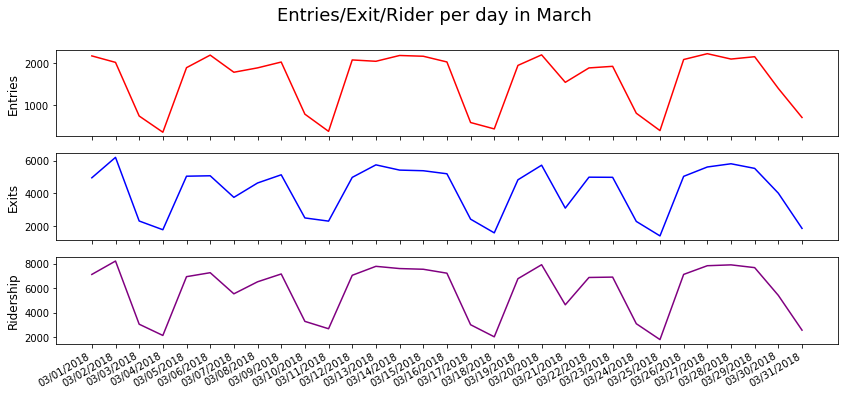

In [169]:
# Plot daily entries for 1 turnstile
# By specifying a single control, unit, scp, & station
fig = plt.figure(figsize=(14, 6))
fig.suptitle('Entries/Exit/Rider per day in March', fontsize=18)
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax1.plot(short_ts_ent['date'],short_ts_ent['net_entries'],color='red')
ax2.plot(short_ts_ext['date'],short_ts_ext['net_exits'],color='blue')
ax3.plot(short_ts_ride['date'],short_ts_ride['ridership'],color='purple')
ax1.set_ylabel('Entries', fontsize=12)
ax2.set_ylabel('Exits', fontsize=12)
ax3.set_ylabel('Ridership', fontsize=12)
fig.autofmt_xdate() # make space for and rotate the x-axis tick labels
plt.show()



### Combining turnstile data by 'control', 'unit', 'station'

In [144]:
df_cus = df.groupby(['control','unit','station','date'],as_index = False)['net_entries', 'net_exits'].sum()
df_cus = df_cus.reset_index()
df_cus

,index,control,unit,station,date,net_entries,net_exits
0,0,A002,R051,59 ST,02/24/2018,6337,3792
1,1,A002,R051,59 ST,02/25/2018,5279,3162
2,2,A002,R051,59 ST,02/26/2018,12411,6931
3,3,A002,R051,59 ST,02/27/2018,13143,8322
4,4,A002,R051,59 ST,02/28/2018,13127,8728
5,5,A002,R051,59 ST,03/01/2018,12811,8216
6,6,A002,R051,59 ST,03/02/2018,11611,7554
7,7,A002,R051,59 ST,03/03/2018,7463,4155
8,8,A002,R051,59 ST,03/04/2018,5690,3343
9,9,A002,R051,59 ST,03/05/2018,12766,7991


### Combining turnstile data by 'station'

In [155]:
df_station = df.groupby(['station_line','date'],as_index = False)['net_entries', 'net_exits'].sum()
df_station = df_station.reset_index()

In [167]:
# Sample station is '1 AV L'
station_ex = df_station.iloc[5:36]
station_ex.head()

,index,station_line,date,net_entries,net_exits
5,5,1 AV L,03/01/2018,22432,24673
6,6,1 AV L,03/02/2018,22303,25030
7,7,1 AV L,03/03/2018,17627,20603
8,8,1 AV L,03/04/2018,14423,15786
9,9,1 AV L,03/05/2018,21579,23255


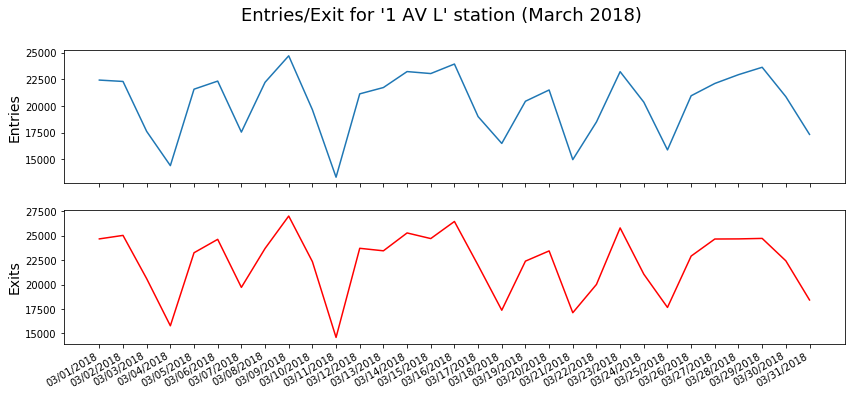

In [171]:
# Plot 1 station
fig = plt.figure(figsize=(14, 6))
fig.suptitle("Entries/Exit for '1 AV L' station (March 2018)", fontsize=18)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(station_ex['date'],station_ex['net_entries'])
ax2.plot(station_ex['date'],station_ex['net_exits'], color='red')
ax1.set_ylabel('Entries', fontsize=14)
ax2.set_ylabel('Exits', fontsize=14)
fig.autofmt_xdate() # make space for and rotate the x-axis tick labels
plt.show()

### Week by week comparison (cont. with 1 AV L)

In [208]:
# Revisit sample station
station_week = df_station.iloc[0:126]
station_week.loc[:,'date'] = pd.to_datetime(station_week.date, format="%m/%d/%Y")

# Creating 'weekday'(station_week['date'])
station_week.loc[:,'dayofweek'] = station_week.date.dt.dayofweek
days = {0:'Monday',
        1:'Tuesday',
        2:'Wednesday',
        3:'Thursday',
        4:'Friday',
        5:'Saturday',
        6:'Sunday'}

station_week.loc[:,'day'] = station_week['dayofweek'].apply(lambda x: days[x])
station_week.loc[:,'week'] = station_week['date'].dt.week
station_week

,index,station_line,date,net_entries,net_exits,dayofweek,day,week
0,0,1 AV L,2018-02-24,15658,18337,5,Saturday,8
1,1,1 AV L,2018-02-25,13885,14871,6,Sunday,8
2,2,1 AV L,2018-02-26,21020,22571,0,Monday,9
3,3,1 AV L,2018-02-27,21961,23831,1,Tuesday,9
4,4,1 AV L,2018-02-28,22322,22668,2,Wednesday,9
5,5,1 AV L,2018-03-01,22432,24673,3,Thursday,9
6,6,1 AV L,2018-03-02,22303,25030,4,Friday,9
7,7,1 AV L,2018-03-03,17627,20603,5,Saturday,9
8,8,1 AV L,2018-03-04,14423,15786,6,Sunday,9
9,9,1 AV L,2018-03-05,21579,23255,0,Monday,10


In [200]:
week_10 = station_week[station_week['week']==10]
week_11 = station_week[station_week['week']==11]
week_12 = station_week[station_week['week']==12]
week_13 = station_week[station_week['week']==13]
week_14 = station_week[station_week['week']==14]
week_15 = station_week[station_week['week']==15]
week_16 = station_week[station_week['week']==16]
week_17 = station_week[station_week['week']==17]
week_18 = station_week[station_week['week']==18]

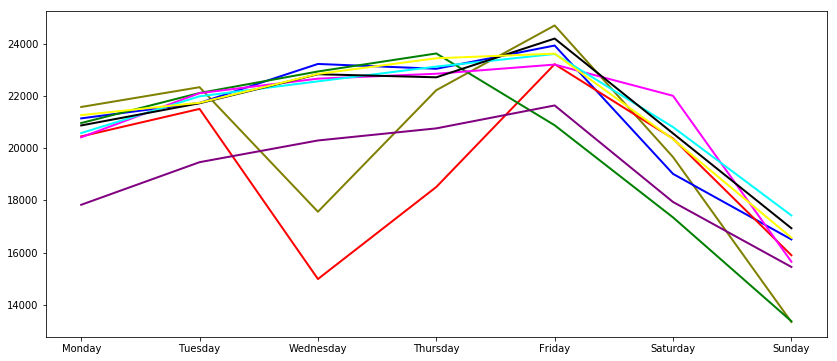

In [201]:
fig = plt.figure(figsize=(14, 6))
plt.plot( 'day', 'net_entries', data=week_10, marker='', color='olive', linewidth=2)
plt.plot( 'day', 'net_entries', data=week_11, marker='', color='blue', linewidth=2)
plt.plot( 'day', 'net_entries', data=week_12, marker='', color='red', linewidth=2)
plt.plot( 'day', 'net_entries', data=week_13, marker='', color='green', linewidth=2)
plt.plot( 'day', 'net_entries', data=week_14, marker='', color='purple', linewidth=2)
plt.plot( 'day', 'net_entries', data=week_15, marker='', color='magenta', linewidth=2)
plt.plot( 'day', 'net_entries', data=week_16, marker='', color='cyan', linewidth=2)
plt.plot( 'day', 'net_entries', data=week_17, marker='', color='black', linewidth=2)
plt.plot( 'day', 'net_entries', data=week_18, marker='', color='yellow', linewidth=2)


### Total ridership

In [119]:
daily_entry = df.groupby(['station_line', 'dayofweek'])['net_entries'].sum()
daily_entry = daily_entry.reset_index()
total_entry = df.groupby(['station_line'])['net_entries'].sum()

daily_exit = df.groupby(['station_line', 'dayofweek'])['net_exits'].sum()
daily_exit = daily_exit.reset_index()
total_exit = df.groupby(['station_line'])['net_exits'].sum()

daily_rider = df.groupby(['station_line', 'dayofweek'])['ridership'].sum()
daily_rider = daily_rider.reset_index()
total_rider = df.groupby(['station_line'])['ridership'].sum()

total_col = ['total_entry', 'total_exit', 'total_rider']
rider_by_station = pd.concat([total_entry, total_exit, total_rider], axis=1)
rider_by_station.columns = total_col

In [136]:
rider_by_station = rider_by_station.reset_index()
ridership_20= rider_by_station.sort_values(by = ['total_rider'], ascending = False).head(20)
ridership_20
ridership_20=ridership_20.reset_index() #so I can call station_line in plot


<BarContainer object of 12 artists>

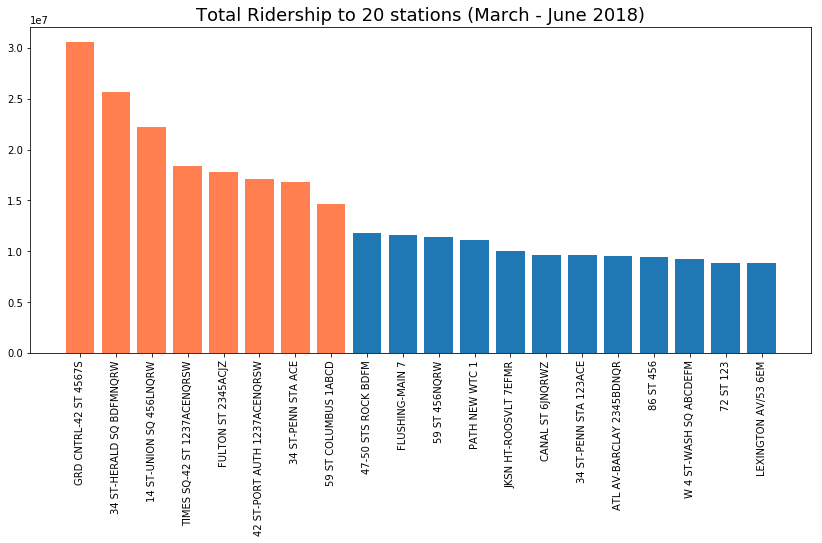

In [203]:
#for plotting pretty
ridership_8 = ridership_20.iloc[0:8]
ridership_12 = ridership_20.iloc[8:]

width = 0.3
fig = plt.figure(figsize=(14, 6))
fig = plt.title('Total Ridership to 20 stations (March - June 2018)', fontsize = 18)
plt.xticks(rotation=90)
plt.bar('station_line', 'total_rider', data=ridership_8, color='coral')
plt.bar('station_line', 'total_rider', data=ridership_12)